In [1]:
import numpy as np
import math
import pandas 
import random 
import time
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
dataframe = pandas.read_csv("energy_efficiency_data.csv")

dataframe.columns = ['relative_compactness', 'surface_area', 
                     'wall_area', 'roof_area', 'overall_height', 
                     'orientation', 'glazing_area', 
                     'glazing_area_distribution', 'heating_load', 
                     'cooling_load']

In [3]:
print(dataframe.head())

   relative_compactness  surface_area  wall_area  roof_area  overall_height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.90         563.5      318.5     122.50             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   orientation  glazing_area  glazing_area_distribution  heating_load  \
0          2.0           0.0                        0.0         15.55   
1          4.0           0.0                        0.0         15.55   
2          5.0           0.0                        0.0         15.55   
3          2.0           0.0                        0.0         20.84   
4          3.0           0.0                        0.0         21.46   

   cooling_load  
0         21.33  
1         21.33  
2         21.33  
3         28.2

In [4]:
print(dataframe.describe())

       relative_compactness  surface_area   wall_area   roof_area  \
count            768.000000    768.000000  768.000000  768.000000   
mean               0.764167    671.708333  318.500000  176.604167   
std                0.105777     88.086116   43.626481   45.165950   
min                0.620000    514.500000  245.000000  110.250000   
25%                0.682500    606.375000  294.000000  140.875000   
50%                0.750000    673.750000  318.500000  183.750000   
75%                0.830000    741.125000  343.000000  220.500000   
max                0.980000    808.500000  416.500000  220.500000   

       overall_height  orientation  glazing_area  glazing_area_distribution  \
count       768.00000   768.000000    768.000000                  768.00000   
mean          5.25000     3.500000      0.234375                    2.81250   
std           1.75114     1.118763      0.133221                    1.55096   
min           3.50000     2.000000      0.000000              

In [5]:
print("Shape:", dataframe.shape)

Shape: (768, 10)


In [6]:
print("Data Types:", dataframe.dtypes)

Data Types: relative_compactness         float64
surface_area                 float64
wall_area                    float64
roof_area                    float64
overall_height               float64
orientation                  float64
glazing_area                 float64
glazing_area_distribution    float64
heating_load                 float64
cooling_load                 float64
dtype: object


In [7]:
print("Correlation:", dataframe.corr(method='pearson'))

Correlation:                            relative_compactness  surface_area     wall_area  \
relative_compactness               1.000000e+00 -9.919015e-01 -2.037817e-01   
surface_area                      -9.919015e-01  1.000000e+00  1.955016e-01   
wall_area                         -2.037817e-01  1.955016e-01  1.000000e+00   
roof_area                         -8.688234e-01  8.807195e-01 -2.923165e-01   
overall_height                     8.277473e-01 -8.581477e-01  2.809757e-01   
orientation                        1.712426e-17  1.203260e-17  0.000000e+00   
glazing_area                      -3.209966e-18  3.631399e-17  1.036064e-17   
glazing_area_distribution          2.161659e-17 -2.419423e-16  0.000000e+00   
heating_load                       6.222722e-01 -6.581202e-01  4.556712e-01   
cooling_load                       6.343391e-01 -6.729989e-01  4.271170e-01   

                              roof_area  overall_height   orientation  \
relative_compactness      -8.688234e-01    8

In [8]:
print(dataframe.values)

[[9.800e-01 5.145e+02 2.940e+02 ... 0.000e+00 1.555e+01 2.133e+01]
 [9.800e-01 5.145e+02 2.940e+02 ... 0.000e+00 1.555e+01 2.133e+01]
 [9.800e-01 5.145e+02 2.940e+02 ... 0.000e+00 1.555e+01 2.133e+01]
 ...
 [6.600e-01 7.595e+02 3.185e+02 ... 5.000e+00 1.492e+01 1.755e+01]
 [6.400e-01 7.840e+02 3.430e+02 ... 5.000e+00 1.819e+01 2.021e+01]
 [6.200e-01 8.085e+02 3.675e+02 ... 5.000e+00 1.648e+01 1.661e+01]]


In [9]:
#shuffle
dataset = np.array(dataframe.values)
dataset_shuf = []
index_shuf = list(range(len(dataset)))
random.shuffle(index_shuf)
for i in index_shuf:
    dataset_shuf.append(dataset[i,:])   
dataset_shuf = np.array(dataset_shuf)
dataset_shuf.reshape(768,10)

array([[7.900e-01, 6.370e+02, 3.430e+02, ..., 4.000e+00, 3.884e+01,
        4.548e+01],
       [7.100e-01, 7.105e+02, 2.695e+02, ..., 1.000e+00, 1.257e+01,
        1.542e+01],
       [7.900e-01, 6.370e+02, 3.430e+02, ..., 1.000e+00, 4.003e+01,
        3.781e+01],
       ...,
       [7.900e-01, 6.370e+02, 3.430e+02, ..., 4.000e+00, 3.710e+01,
        3.529e+01],
       [8.200e-01, 6.125e+02, 3.185e+02, ..., 1.000e+00, 2.953e+01,
        2.899e+01],
       [6.900e-01, 7.350e+02, 2.940e+02, ..., 3.000e+00, 1.246e+01,
        1.438e+01]])

In [10]:
X_train = dataset_shuf[:576,0:8]
Y_train = dataset_shuf[:576,8:9]
X_train.reshape(576,8)
Y_train.reshape(576,1)

X_test = dataset_shuf[576:,0:8]
Y_test = dataset_shuf[576:,8:9]
X_test.reshape(192,8)
Y_test.reshape(192,1)

array([[ 6.79],
       [36.45],
       [15.16],
       [12.97],
       [28.67],
       [21.46],
       [38.89],
       [11.44],
       [32.46],
       [12.35],
       [15.55],
       [11.38],
       [36.9 ],
       [39.04],
       [10.14],
       [28.55],
       [10.42],
       [32.67],
       [13.18],
       [33.28],
       [32.85],
       [14.12],
       [14.39],
       [40.12],
       [12.12],
       [11.6 ],
       [16.76],
       [24.6 ],
       [29.88],
       [12.47],
       [41.92],
       [29.14],
       [25.7 ],
       [12.27],
       [13.68],
       [32.84],
       [25.37],
       [16.35],
       [12.67],
       [14.33],
       [16.69],
       [32.82],
       [29.06],
       [16.92],
       [25.41],
       [12.77],
       [10.78],
       [29.87],
       [17.14],
       [42.96],
       [12.28],
       [15.29],
       [14.53],
       [25.48],
       [12.18],
       [31.29],
       [33.16],
       [23.8 ],
       [25.38],
       [15.34],
       [24.77],
       [34.24],
       [

In [11]:
#one-hot
transformer = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [5,7])],remainder='passthrough')
X_train = np.array(transformer.fit_transform(X_train), dtype=np.float)

X_test = np.array(transformer.fit_transform(X_test), dtype=np.float)



In [12]:
pandas.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.79,637.0,343.0,147.0,7.0,0.25
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.71,710.5,269.5,220.5,3.5,0.25
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.79,637.0,343.0,147.0,7.0,0.25
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.66,759.5,318.5,220.5,3.5,0.00
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.62,808.5,367.5,220.5,3.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.90,563.5,318.5,122.5,7.0,0.25
572,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.76,661.5,416.5,122.5,7.0,0.25
573,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.86,588.0,294.0,147.0,7.0,0.25
574,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.62,808.5,367.5,220.5,3.5,0.25


In [13]:
#標準化
X_scaled = np.copy(X_train[:,10:16])
X_scaled2 = np.copy(X_test[:,10:16])

scaler = preprocessing.StandardScaler().fit(X_scaled)

X_scaled = scaler.transform(X_scaled)
X_scaled2 = scaler.transform(X_scaled2)


In [14]:
X_train = np.copy(X_train[:,0:10])
X_test = np.copy(X_test[:,0:10])
X_train = np.append(X_train, X_scaled, axis = 1)
X_test = np.append(X_test, X_scaled2, axis = 1)

pandas.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.243013,-0.393803,0.603607,-0.676291,1.017514,0.122642
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.514635,0.443210,-1.081421,0.955875,-0.982787,0.122642
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.243013,-0.393803,0.603607,-0.676291,1.017514,0.122642
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.988166,1.001218,0.041931,0.955875,-0.982787,-1.766176
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.366990,1.559226,1.165283,0.955875,-0.982787,-1.766176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.284780,-1.230815,0.041931,-1.220346,1.017514,0.122642
572,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.041105,-0.114799,2.288635,-1.220346,1.017514,0.122642
573,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.905956,-0.951811,-0.519745,-0.676291,1.017514,0.122642
574,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.366990,1.559226,1.165283,0.955875,-0.982787,0.122642


In [15]:
#define weight:

#16 for hidden layer1
#64 for hidden layer2
#64 for hidden layer3
#64 for hidden layer4
#64 for hidden layer5
#8 for output layer6

weight_hidden = np.random.random((16,64))-0.5
weight_hidden2 = np.random.random((64,64))-0.5
weight_hidden3 = np.random.random((64,64))-0.5
weight_hidden4 = np.random.random((64,64))-0.5
weight_hidden5 = np.random.random((64,8))-0.5
weight_output = np.random.random((8,1))-0.5
lr = 0.00003

bias = 0.01
bias1 = 0.01
bias2 = 0.01
bias3 = 0.01
bias4 = 0.01
bias5 = 0.01


In [16]:
def ReLU(x) :
    return x * (x > 0) + 0.01 * x * (x <= 0)

def ReLU_der(x) :
    return 1 * (x > 0) + 0.01 * (x <= 0)

def limit(x) :  
    while(np.max(x) > 0.1 or np.min(x) < -0.1) : 
            x /= 10
    return x        

-------------
now training  0.0 %
loss: 223164.64162764826
rmse: 19.6834604157117
-------------
now training  5.0 %
loss: 2204.1707456969975
rmse: 1.9561915352006358
-------------
now training  10.0 %
loss: 1320.7302101271302
rmse: 1.514243835246432
-------------
now training  15.0 %
loss: 808.8837275589586
rmse: 1.185036719689344
-------------
now training  20.0 %
loss: 457.7430541527545
rmse: 0.8914554404727878
-------------
now training  25.0 %
loss: 398.54410527685275
rmse: 0.8318153938458824
-------------
now training  30.0 %
loss: 167.83631800149365
rmse: 0.5397985703300546
-------------
now training  35.0 %
loss: 138.84783540058277
rmse: 0.4909737974603924
-------------
now training  40.0 %
loss: 87.37485491932713
rmse: 0.3894771578118095
-------------
now training  45.0 %
loss: 48.345829405840675
rmse: 0.2897131885285209
-------------
now training  50.0 %
loss: 48.47124676113634
rmse: 0.29008872792891705
-------------
now training  55.0 %
loss: 30.397429962720352
rmse: 0.229724

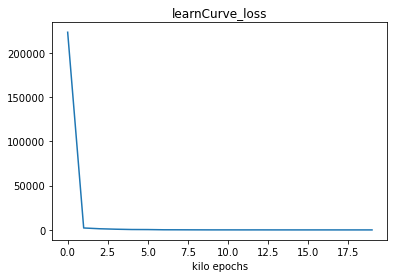

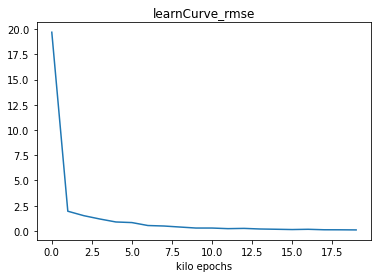

In [17]:
epochtimes = 20000
mini_batch = 16
bestloss1 = 1e30 #Mini Batch Loss
preloss = 1e30   #decay the learning rate
start = time.time()

lossCurve = []
rmseCurve = []

for epoch in range(epochtimes):
    X_train_random = []
    Y_train_random = []
    for i in range(mini_batch):
        rindex = random.randint(0,len(X_train)-1)
        X_train_random.append(X_train[rindex,:])
        Y_train_random.append(Y_train[rindex,:])
    X_train_random = np.array(X_train_random)
    Y_train_random = np.array(Y_train_random)
    
    
        
    input_hidden = np.dot(X_train_random, weight_hidden) + bias
    output_hidden = ReLU(input_hidden)
    
    input_hidden2 = np.dot(output_hidden, weight_hidden2) + bias1
    output_hidden2 = ReLU(input_hidden2)
    input_hidden3 = np.dot(output_hidden2, weight_hidden3) + bias2
    output_hidden3 = ReLU(input_hidden3)
    input_hidden4 = np.dot(output_hidden3, weight_hidden4) + bias3
    output_hidden4 = ReLU(input_hidden4)
    input_hidden5 = np.dot(output_hidden4, weight_hidden5) + bias4
    output_hidden5 = ReLU(input_hidden5)
    input_op = np.dot(output_hidden5, weight_output) + bias5
    output_op = ReLU(input_op)
    
    
    
    #==========================================
    
    derror_douto = output_op - Y_train_random
    douto_dino = ReLU_der(input_op)
    dino_dwo = output_hidden5      
    derror_dwo = np.dot(dino_dwo.T, derror_douto * douto_dino)
    derror_dbias5 = derror_douto * douto_dino
    
    #==========================================
    
    derror_dino = derror_douto * douto_dino
    dino_douth5 = weight_output
    derror_douth5 = np.dot(derror_dino, dino_douth5.T)
    douth5_dinh5 = ReLU_der(input_hidden5)
    dinh5_dwh5 = output_hidden4
    derror_dwh5 = np.dot(dinh5_dwh5.T, douth5_dinh5 * derror_douth5)
    derror_dbias4 = douth5_dinh5 * derror_douth5
    
    #==========================================
    
    derror_dinh5 = derror_douth5 * douth5_dinh5
    dinh5_douth4 = weight_hidden5
    derror_douth4 = np.dot(derror_dinh5, dinh5_douth4.T)
    douth4_dinh4 = ReLU_der(input_hidden4)
    dinh4_dwh4 = output_hidden3
    derror_dwh4 = np.dot(dinh4_dwh4.T, douth4_dinh4 * derror_douth4)
    derror_dbias3 = douth4_dinh4 * derror_douth4
    
    #==========================================
    
    derror_dinh4 = derror_douth4 * douth4_dinh4
    dinh4_douth3 = weight_hidden4
    derror_douth3 = np.dot(derror_dinh4, dinh4_douth3.T)
    douth3_dinh3 = ReLU_der(input_hidden3)
    dinh3_dwh3 = output_hidden2
    derror_dwh3 = np.dot(dinh3_dwh3.T, douth3_dinh3 * derror_douth3)
    derror_dbias2 = douth3_dinh3 * derror_douth3
    
    #==========================================
    
    derror_dinh3 = derror_douth3 * douth3_dinh3
    dinh3_douth2 = weight_hidden3
    derror_douth2 = np.dot(derror_dinh3, dinh3_douth2.T)
    douth2_dinh2 = ReLU_der(input_hidden2)
    dinh2_dwh2 = output_hidden
    derror_dwh2 = np.dot(dinh2_dwh2.T, douth2_dinh2 * derror_douth2)
    derror_dbias1 = douth2_dinh2 * derror_douth2
    
    #==========================================
    
    derror_dinh2 = derror_douth2 * douth2_dinh2
    dinh2_douth = weight_hidden2
    derror_douth = np.dot(derror_dinh2, dinh2_douth.T)
    douth_dinh = ReLU_der(input_hidden)
    dinh_dwh = X_train_random
    derror_dwh = np.dot(dinh_dwh.T, douth_dinh * derror_douth)
    derror_dbias = douth_dinh * derror_douth
    
    #==========================================
       
    
    
    weight_hidden -= limit(lr * derror_dwh)
    weight_hidden2 -= limit(lr * derror_dwh2)
    weight_hidden3 -= limit(lr * derror_dwh3)
    weight_hidden4 -= limit(lr * derror_dwh4)
    weight_hidden5 -= limit(lr * derror_dwh5)
    weight_output -= limit(lr * derror_dwo)
    
    bias -= lr * derror_dbias.sum()/np.size(derror_dbias)
    bias1 -= lr * derror_dbias1.sum()/np.size(derror_dbias1)
    bias2 -= lr * derror_dbias2.sum()/np.size(derror_dbias2)
    bias3 -= lr * derror_dbias3.sum()/np.size(derror_dbias3)
    bias4 -= lr * derror_dbias4.sum()/np.size(derror_dbias4)
    bias5 -= lr * derror_dbias5.sum()/np.size(derror_dbias5)
    
    error_out = np.power((output_op - Y_train_random), 2)
    #print(error_out.sum())
    
        
        
    #calulate error 
    if epoch % 1000 == 0 : 
        input_hidden = np.dot(X_train, weight_hidden) + bias
        output_hidden = ReLU(input_hidden)
        input_hidden2 = np.dot(output_hidden, weight_hidden2) + bias1
        output_hidden2 = ReLU(input_hidden2)
        input_hidden3 = np.dot(output_hidden2, weight_hidden3) + bias2
        output_hidden3 = ReLU(input_hidden3)
        input_hidden4 = np.dot(output_hidden3, weight_hidden4) + bias3
        output_hidden4 = ReLU(input_hidden4)
        input_hidden5 = np.dot(output_hidden4, weight_hidden5) + bias4
        output_hidden5 = ReLU(input_hidden5)
        input_op = np.dot(output_hidden5, weight_output)+ bias5
        output_op = ReLU(input_op)
        
        error_out = np.power((output_op - Y_train), 2)
   
        #set decay for learning rate
        if error_out.sum() > preloss :
            lr *= 0.9
            
        preloss = error_out.sum()  
              
        lossCurve.append(error_out.sum())
        rmseCurve.append(math.sqrt(error_out.sum()/len(Y_train)))
        print("-------------")
        print('now training ',epoch*100/epochtimes,'%')
        print('loss:',error_out.sum())
        print('rmse:',math.sqrt(error_out.sum()/len(Y_train)))
        #print(error_out)
        #print('\n',lr * derror_dwh,'\n', lr * derror_dwo,'\n')
        
       
        #print(derror_wh, derror_wo)
print("")
print("=====================================")
print("")

plt.plot(lossCurve)
plt.title('learningCurve_loss')
plt.xlabel('kilo epochs')

plt.show()

print("")
print("=====================================")
print("")

plt.plot(rmseCurve)
plt.title('learningCurve_rmse')
plt.xlabel('kilo epochs')

plt.show()
end = time.time()


result: 
RMSE =  0.09936028301131519




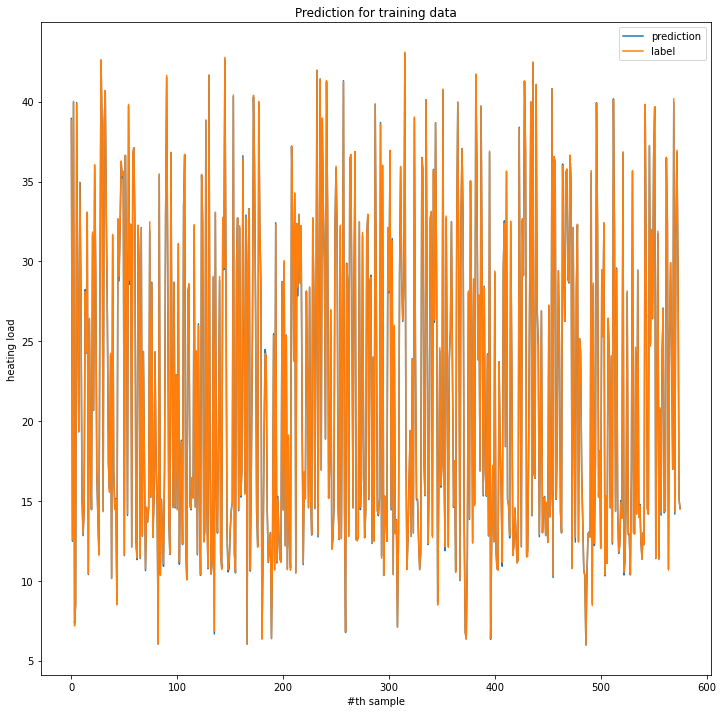

In [18]:
input_hidden = np.dot(X_train, weight_hidden) + bias
output_hidden = ReLU(input_hidden)
input_hidden2 = np.dot(output_hidden, weight_hidden2) + bias1
output_hidden2 = ReLU(input_hidden2)
input_hidden3 = np.dot(output_hidden2, weight_hidden3) + bias2
output_hidden3 = ReLU(input_hidden3)
input_hidden4 = np.dot(output_hidden3, weight_hidden4) + bias3
output_hidden4 = ReLU(input_hidden4)
input_hidden5 = np.dot(output_hidden4, weight_hidden5) + bias4
output_hidden5 = ReLU(input_hidden5)
input_op = np.dot(output_hidden5, weight_output)
output_op = ReLU(input_op)
error_out = ((1 / len(Y_train)) * (np.power((output_op - Y_train), 2)))
print("")
print('result: ')
print("RMSE = ",math.sqrt(error_out.sum()))
print("")
print("=====================================")
print("")

p1, = plt.plot(output_op)
p2, = plt.plot(Y_train)
plt.title('Prediction for training data')
plt.legend([p1, p2], ["prediction", "label"])
plt.xlabel('#th sample')
plt.ylabel('heating load')
plt.gcf().set_size_inches(12,12)

plt.show()

In [19]:
single_point = np.array(X_train)
result1 = np.dot(single_point, weight_hidden) + bias
result2 = ReLU(result1)
result3 = np.dot(result2, weight_hidden2) + bias1
result4 = ReLU(result3)
result5 = np.dot(result4, weight_hidden3) + bias2
result6 = ReLU(result5)
result7 = np.dot(result6, weight_hidden4) + bias3
result8 = ReLU(result7)
result9 = np.dot(result8, weight_hidden5) + bias4
result10 = ReLU(result9)
result11 = np.dot(result10, weight_output) + bias5
result12 = ReLU(result11)
#print(result12)
#print(Y_train_random)
error_out = ((1/len(Y_train)) * (np.power((result12 - Y_train), 2)))
#print(error_out)
print(error_out.sum())

0.009364977814570331


In [20]:
print("bias:",bias )
print("bias1:",bias1 )
print("bias2:",bias2 )
print("bias3:",bias3 )
print("bias4:",bias4 )
print("bias5:",bias5 )

bias: 0.011413922602795685
bias1: 0.010775300045021955
bias2: 0.01052960260166827
bias3: 0.01022994608425355
bias4: 0.010727878313733669
bias5: 0.01487120433339161


In [21]:
single_point = np.array(X_test)
result1 = np.dot(single_point, weight_hidden)
result2 = ReLU(result1)
result3 = np.dot(result2, weight_hidden2)
result4 = ReLU(result3)
result5 = np.dot(result4, weight_hidden3)
result6 = ReLU(result5)
result7 = np.dot(result6, weight_hidden4)
result8 = ReLU(result7)
result9 = np.dot(result8, weight_hidden5)
result10 = ReLU(result9)
result11 = np.dot(result10, weight_output)
result12 = ReLU(result11)
print(result12)
print(Y_test)
print(len(X_test))
error_out = ((1/len(X_test)) * (np.power((result12 - Y_test), 2)))
print(math.sqrt(error_out.sum()))

[[ 6.2242048 ]
 [36.52360048]
 [13.37449959]
 [16.53586463]
 [30.02225867]
 [19.69364659]
 [37.66642181]
 [13.70726424]
 [31.70048525]
 [ 9.92994304]
 [15.14244697]
 [13.80756213]
 [32.82812339]
 [38.46732229]
 [ 8.58306694]
 [27.8568663 ]
 [ 7.86943822]
 [33.67601535]
 [12.9038972 ]
 [29.03590327]
 [33.03425192]
 [12.56860158]
 [12.57113578]
 [33.3369784 ]
 [11.0865006 ]
 [11.88267004]
 [17.28720269]
 [22.94196619]
 [27.92196333]
 [14.75445755]
 [36.38743656]
 [29.37683503]
 [27.59810825]
 [11.7594969 ]
 [13.27491743]
 [34.10694383]
 [28.77624038]
 [18.04998029]
 [10.63702976]
 [14.78201094]
 [13.61802209]
 [30.14860071]
 [27.96381541]
 [14.35089472]
 [23.17551575]
 [13.71687663]
 [10.55239865]
 [29.89376262]
 [18.45758486]
 [38.54941776]
 [11.7291974 ]
 [13.46460962]
 [13.5245317 ]
 [28.53360052]
 [11.56021102]
 [31.51455434]
 [31.45009114]
 [27.50508105]
 [28.13143892]
 [15.17292262]
 [21.31069916]
 [35.42419598]
 [39.91911514]
 [36.27871528]
 [26.09522418]
 [14.09083956]
 [29.34864


result: 
RMSE =  2.189379705404417




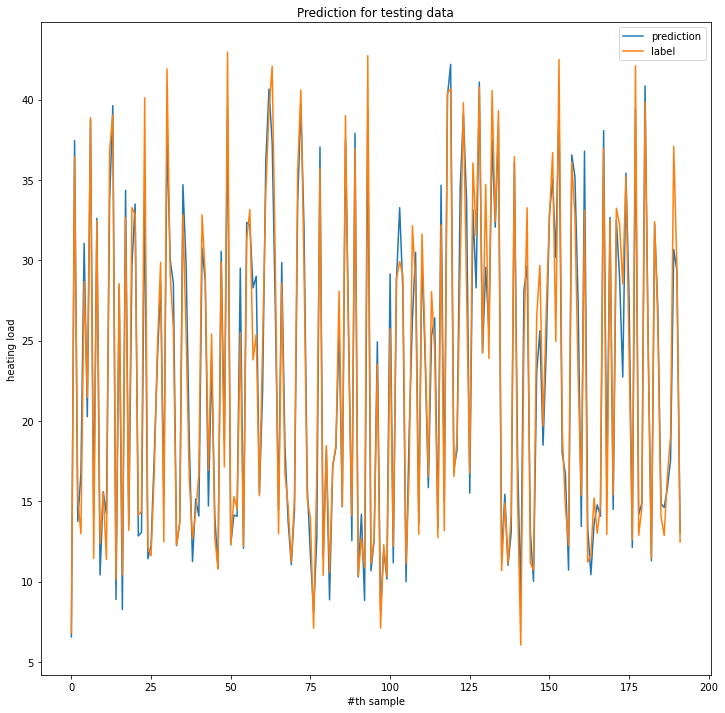

In [22]:
single_point = np.array(X_test)
result1 = np.dot(single_point, weight_hidden) + bias
result2 = ReLU(result1)
result3 = np.dot(result2, weight_hidden2) + bias1
result4 = ReLU(result3)
result5 = np.dot(result4, weight_hidden3) + bias2
result6 = ReLU(result5)
result7 = np.dot(result6, weight_hidden4) + bias3
result8 = ReLU(result7)
result9 = np.dot(result8, weight_hidden5) + bias4
result10 = ReLU(result9)
result11 = np.dot(result10, weight_output) + bias5
result12 = ReLU(result11)
#print(result12)
#print(Y_test)
#print(len(X_test))
error_out = ((1/len(X_test)) * (np.power((result12 - Y_test), 2)))
#print(math.sqrt(error_out.sum()))
print("")
print('result: ')
print("RMSE = ",math.sqrt(error_out.sum()))
print("")
print("=====================================")
print("")

p1, = plt.plot(result12)
p2, = plt.plot(Y_test)
plt.title('Prediction for testing data')
plt.legend([p1, p2], ["prediction", "label"])
plt.xlabel('#th sample')
plt.ylabel('heating load')
plt.gcf().set_size_inches(12,12)

plt.show()